In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

In [18]:
# Read in csv
csv_path = Path("tsla_google_finance.csv")
tsla_df = pd.read_csv(csv_path)
tsla_df.head()

,Date,Close
0,11/13/18,338.73
1,11/14/18,344.00
2,11/15/18,348.44
3,11/16/18,354.31
4,11/19/18,353.47


In [19]:
# Set `Date` as index
tsla_df.set_index('Date', inplace=True)
tsla_df.head()

,Close
Date,
11/13/18,338.73
11/14/18,344.00
11/15/18,348.44
11/16/18,354.31
11/19/18,353.47


In [29]:
# Check for nulls
tsla_df.isnull().sum()

# Drop missing values

# Validate no more missing values

Close    0
dtype: int64

In [31]:
# Calculate daily returns
daily_returns = tsla_df.pct_change()

# Sort data by `Close` in descending order
daily_returns = daily_returns.sort_values("Close", ascending = False)
# daily_returns.iloc[:5] => top 5
daily_returns.head()

,Close
Date,
12/26/18,0.103930
11/26/18,0.061903
1/4/19,0.057697
2/27/19,0.056671
12/28/18,0.056116


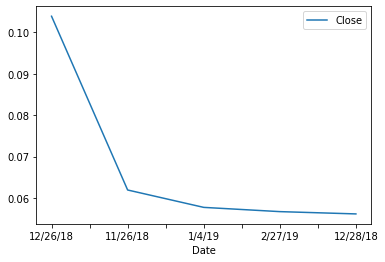

In [32]:
# Plot top 5 performing days
daily_returns.head().plot()

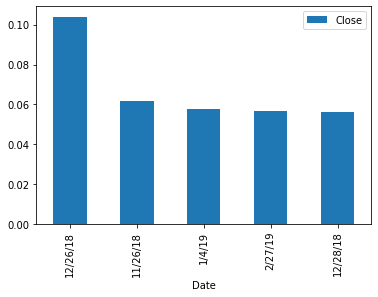

In [33]:
# Alternatively, visualizing the returns as a bar chart:
daily_returns.head().plot(kind="bar")

In [2]:
#### GROUPING ####

# Read in CSV file
csv_path = Path("crypto_data.csv")
crypto_data = pd.read_csv(csv_path, index_col='data_date', parse_dates=True, infer_datetime_format=True)
crypto_data.head()

# Drop extraneous columns
crypto_data = crypto_data.drop(columns=['data_time','timestamp'])
crypto_data = crypto_data.dropna()
crypto_data.head()


,cryptocurrency,data_priceUsd
data_date,,
2017-05-10,bitcoin,1743.723523
2017-05-11,bitcoin,1828.678209
2017-05-12,bitcoin,1776.443919
2017-05-13,bitcoin,1714.964198
2017-05-14,bitcoin,1789.278913


cryptocurrency
bitcoin         AxesSubplot(0.125,0.2;0.775x0.68)
bitcoin-cash    AxesSubplot(0.125,0.2;0.775x0.68)
ethereum        AxesSubplot(0.125,0.2;0.775x0.68)
litecoin        AxesSubplot(0.125,0.2;0.775x0.68)
ripple          AxesSubplot(0.125,0.2;0.775x0.68)
Name: data_priceUsd, dtype: object

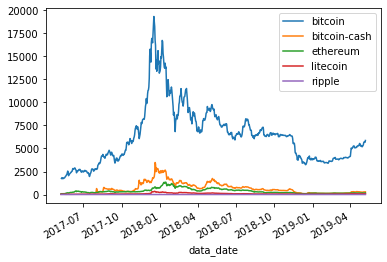

In [4]:
# Group data by cryptocurrency and plot on the same chart
grouped_crypto_data = crypto_data.groupby('cryptocurrency')
grouped_crypto_data['data_priceUsd'].plot(legend=True)

In [10]:
# Calculate average price across two years for each cryptocurrency
grouped_crypto_data.mean()

,data_priceUsd
cryptocurrency,
bitcoin,6323.018445
bitcoin-cash,733.997564
ethereum,369.037426
litecoin,85.618264
ripple,0.475986


In [11]:
# Calculate max price across two years for each cryptocurrency
grouped_crypto_data.max()

,data_priceUsd
cryptocurrency,
bitcoin,19339.922660
bitcoin-cash,3476.844119
ethereum,1346.037491
litecoin,352.713468
ripple,2.999459


In [12]:
# Calculate min price across two years for each cryptocurrency
grouped_crypto_data.min()

,data_priceUsd
cryptocurrency,
bitcoin,1714.964198
bitcoin-cash,78.977344
ethereum,84.374014
litecoin,22.550468
ripple,0.154144


In [14]:
# Multi-indexing

import pandas as pd
from pathlib import Path
from datetime import datetime, date, timedelta

# Read csv data
csv_path = Path("goog_google_finance.csv")
goog_df = pd.read_csv(
    csv_path, parse_dates=True, index_col="Date", infer_datetime_format=True
)
goog_df.head()

,Close
Date,
2019-05-13,1132.03
2019-05-10,1164.27
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10


In [15]:
# Check for nulls
goog_df.isnull().mean() * 100

# Drop nulls
goog_df = goog_df.dropna()

# Drop duplicates
goog_df = goog_df.drop_duplicates()

# Validate no more missing values
goog_df.isnull().sum()

Close    0
dtype: int64

In [18]:
# Group by year and month
goog_df['year'] = goog_df.index.year
goog_df['month'] = goog_df.index.month
goog_df_grp = goog_df.groupby(['year', 'month']).first()
goog_df_grp

Close
year month         
2019 2      1119.92
     3      1173.31
     4      1188.48
     5      1132.03

In [19]:
goog_df_grp.loc[2019, 5]

Close    1132.03
Name: (2019, 5), dtype: float64

In [43]:
# Concatenation

import pandas as pd
from pathlib import Path

fin_leaders_america_path = Path('fin_leaders_america.csv')
investors_leadership_path = Path('invstrs_leadership.csv')
fin_leaders_mem_path = Path('fin_leaders_members.csv')
investors_leadership_mem_path = Path('invstrs_leadership_members.csv')


fin_dues = pd.read_csv(fin_leaders_america_path)
inv_dues = pd.read_csv(investors_leadership_path)
fin_memb = pd.read_csv(fin_leaders_mem_path)
inv_memb = pd.read_csv(investors_leadership_mem_path)

In [49]:
# Concat dues data using rows axis and inner join
c1 = pd.concat([fin_dues, inv_dues], axis = 'rows', join = 'inner')

# Concat member data using rows axis and inner join
c2 = pd.concat([fin_memb, inv_memb], axis = 'rows', join = 'inner')

c2

,MemberName,MembershipStatus
0,Warren Buffet,Good Standing
1,Janet Yellen,Good Standing
2,Abigail Johnson,Good Standing
3,Larry Fink,Delinquent
0,Warren Buffet,Good Standing
1,Janet Yellen,Good Standing
2,Abigail Johnson,Good Standing
3,Larry Fink,Delinquent
4,Mario Draghi,Delinquent
5,Michael Bloomberg,Delinquent


In [31]:
pd.concat([c1, c2], axis = 'columns', join = 'inner')

,MemberName,DuesOwed,DuesPaid,MemberName,MembershipStatus
0,Warren Buffet,0,2500,Warren Buffet,Good Standing
1,Janet Yellen,100,2400,Janet Yellen,Good Standing
2,Abigail Johnson,0,2500,Abigail Johnson,Good Standing
3,Larry Fink,2500,0,Larry Fink,Delinquent
0,Warren Buffet,0,2500,Warren Buffet,Good Standing
1,Janet Yellen,100,2400,Janet Yellen,Good Standing
2,Abigail Johnson,0,2500,Abigail Johnson,Good Standing
3,Larry Fink,2500,0,Larry Fink,Delinquent
4,Mario Draghi,2500,0,Mario Draghi,Delinquent
5,Michael Bloomberg,2500,0,Michael Bloomberg,Delinquent


In [32]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

harold_portfolio_path = Path("harold_portfolio.csv")
my_portfolio_path = Path("my_portfolio.csv")

# Read in data
harold_portfolio = pd.read_csv(harold_portfolio_path, parse_dates=True, infer_datetime_format=True)
my_portfolio = pd.read_csv(my_portfolio_path, parse_dates=True, infer_datetime_format=True)

# Drop na
harold_portfolio = harold_portfolio.dropna()
my_portfolio = my_portfolio.dropna()

# Set Date as index
harold_portfolio = harold_portfolio.set_index('Date')
my_portfolio = my_portfolio.set_index('Date')


,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,
2019-05-20,8118.39,0.001187,0.003041,261.09,95.06,0.398003,0.338667,0.135545,0.028509,0.017992
2019-05-19,8200.00,0.001056,0.003178,234.03,86.65,0.417700,0.300430,0.141485,0.029277,0.019170
2019-05-18,7262.40,0.000993,0.003005,244.59,89.88,0.372736,0.287630,0.128833,0.026823,0.017685
2019-05-17,7363.69,0.000957,0.002962,264.39,95.75,0.386193,0.259506,0.126562,0.027220,0.017892
2019-05-16,7878.96,0.000885,0.003168,249.00,102.26,0.419707,0.223316,0.137283,0.028857,0.018725


In [33]:
harold_portfolio.head()

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,
2019-05-20,8118.39,0.001187,0.003041,261.09,95.06,0.398003,0.338667,0.135545,0.028509,0.017992
2019-05-19,8200.00,0.001056,0.003178,234.03,86.65,0.417700,0.300430,0.141485,0.029277,0.019170
2019-05-18,7262.40,0.000993,0.003005,244.59,89.88,0.372736,0.287630,0.128833,0.026823,0.017685
2019-05-17,7363.69,0.000957,0.002962,264.39,95.75,0.386193,0.259506,0.126562,0.027220,0.017892
2019-05-16,7878.96,0.000885,0.003168,249.00,102.26,0.419707,0.223316,0.137283,0.028857,0.018725


In [34]:
my_portfolio.head()

,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,
2019-05-20,8200.00,0.003041,261.09,95.06,0.398003,0.135545
2019-05-19,7262.40,0.003178,234.03,86.65,0.417700,0.141485
2019-05-18,7363.69,0.003005,244.59,89.88,0.372736,0.128833
2019-05-17,7878.96,0.002962,264.39,95.75,0.386193,0.126562
2019-05-16,8203.32,0.003168,249.00,102.26,0.419707,0.137283


In [38]:
# Calculate daily returns
my_returns = my_portfolio.pct_change().dropna()
harold_returns = harold_portfolio.pct_change().dropna()

In [39]:
my_and_harold = pd.concat([my_returns, harold_returns], axis = 'columns', join = 'inner')
my_and_harold.head(2)

,BTC,DOGE,ETH,LTC,XRP,XLM,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL
Date,,,,,,,,,,,,,,,,
2019-05-19,-0.114341,0.045051,-0.103642,-0.088470,0.049490,0.043823,0.010052,-0.110362,0.045051,-0.103642,-0.088470,0.049490,-0.112904,0.043823,0.026939,0.065474
2019-05-18,0.013947,-0.054437,0.045122,0.037276,-0.107647,-0.089423,-0.114341,-0.059659,-0.054437,0.045122,0.037276,-0.107647,-0.042606,-0.089423,-0.083820,-0.077465


In [40]:
my_and_harold.std()

BTC      0.071562
DOGE     0.050907
ETH      0.091517
LTC      0.084703
XRP      0.080277
XLM      0.065825
BTC      0.070488
BTT      0.030731
DOGE     0.050907
ETH      0.091517
LTC      0.084703
XRP      0.080277
SOLVE    0.059016
XLM      0.065825
TRON     0.064923
ZIL      0.064726
dtype: float64

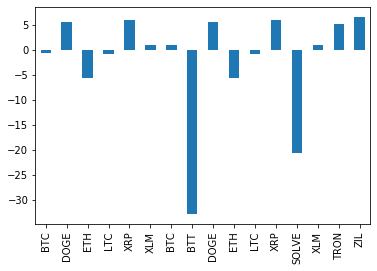

In [42]:
# Assuming risk-free rate is zero
sharpe_ratios = my_and_harold.mean() * 252 / (my_and_harold.std() * np.sqrt(252))
sharpe_ratios.plot(kind='bar')